### Linear Regression

Suitability of the logistic regression for solving our problem
We chose to use logistic regression as the first algorithm to solve our problem due to the binary outcome researched. We wanted the probability of a cat having a good outcome in a shelter and for our results to be interpretable, so logistic regression was the best fit.

We used a test set size of 30% of our 1647 data points. 

In [13]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import validation_curve
url = 'https://raw.githubusercontent.com/COGS118A/Group009-SP23/main/clean_data.csv'
data = pd.read_csv(url)
# Ensure data is loaded correctly
data = data.dropna()
print(data.shape)
#print(data.isnull().sum())

(16467, 215)


In [14]:
# Define predictors and labels
X = data.drop('good_outcome', axis=1)
y = data['good_outcome']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
print("Model accuracy: ", accuracy_score(y_test, y_pred, normalize=True), "\n")
print("Classification report:")
print(classification_report(y_test, y_pred))

Model accuracy:  0.7298117789921068 

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.51      0.58      1828
           1       0.75      0.86      0.80      3113

    accuracy                           0.73      4941
   macro avg       0.71      0.69      0.69      4941
weighted avg       0.72      0.73      0.72      4941



<Figure size 640x480 with 0 Axes>

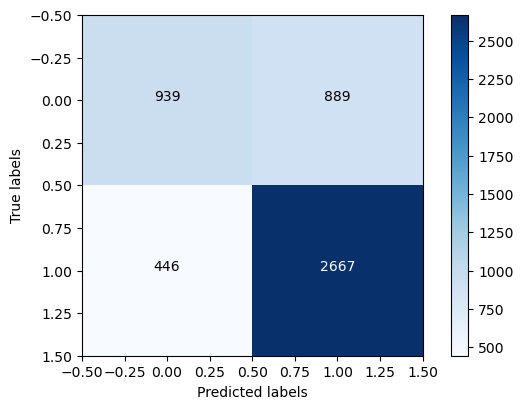

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [17]:
# Performance Metrics
recall = 1274 / (1274 + 554)
precision = 1274 / (1274 + 177)
print("Recall: ", recall, '\n')
print("Precision: ", precision, '\n')
print("F1-Score: ", 2 * ((recall * precision) / (recall + precision)) , '\n')
print("Specificity: ", 2936 / (2936 + 177), '\n')

Recall:  0.6969365426695843 

Precision:  0.8780151619572708 

F1-Score:  0.7770661787130223 

Specificity:  0.9431416639897205 



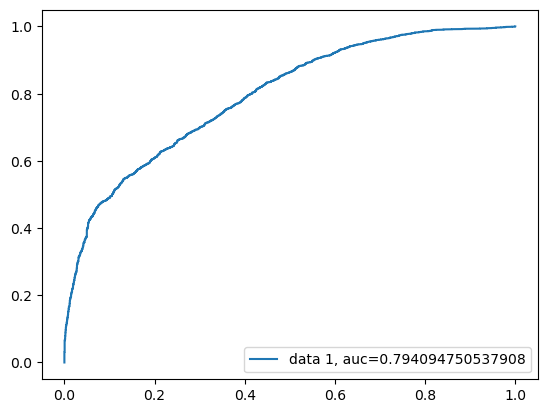

ROC-AUC Score:  0.794094750537908


In [18]:
# ROC-AUC Curve
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("ROC-AUC Score: ", roc_auc_score(y_test, y_pred_proba, average=None))

Our Logistic Regression model performed well with it performing with an accuracy of 0.73% on our test data. Our model also has an ROC-AUC score of 0.79, which means it performs extremely well and is highly accurate. When looking at other evaluation metrics, we see that our model has a recall score of 69%, precision score of 87%, specificity score of 94%, and a f1-score of 77%.

Overall, our model exhibits good accuracy and relatively good performance in correctly identifying positive cases. However, we though of different ways to get a better accuracy.

#### Optimizing our model

We wanted to see the impact of a single hyperparameter on the model's performance.

The resulting validation curve plot shows the training and validation scores as a function of the "C" parameter. The shaded areas represent the standard deviation of the scores. The plot helps visualize the relationship between the "C" parameter and the model's performance, allowing us to identify the optimal value for "C" that balances bias and variance.

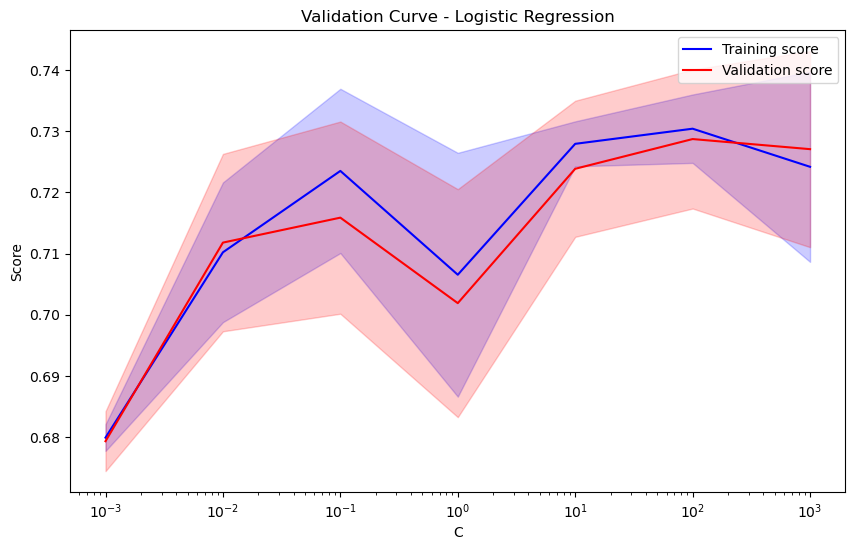

In [29]:
param_range = np.logspace(-3, 3, 7)

train_scores, valid_scores = validation_curve(
    estimator=LogisticRegression(max_iter=1000),
    X=X_train,
    y=y_train,
    param_name='C',
    param_range=param_range,
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='blue')
plt.plot(param_range, valid_mean, label='Validation score', color='red')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')

plt.xlabel('C')
plt.ylabel('Score')
plt.xscale('log')
plt.title('Validation Curve - Logistic Regression')

plt.legend(loc='best')

plt.show()

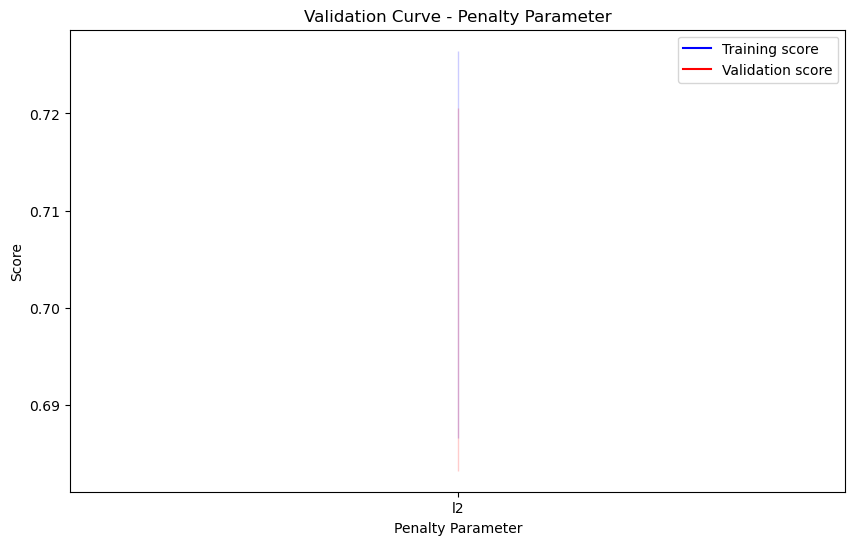